<a href="https://colab.research.google.com/github/semnouws/PRA3024/blob/main/LHCb_2024_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 5!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.
.

In [1]:
#run this once per kernal crash
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get install libpython3.6-dev
!pip install uproot


Streaminguitvoer ingekort tot de laatste 5000 regels.
  inflating: root_build/tutorials/gui/buttonsLayout.C  
  inflating: root_build/tutorials/gui/statusBar.C  
  inflating: root_build/tutorials/gui/buttongroupState.C  
  inflating: root_build/tutorials/gui/exec3.C  
   creating: root_build/tutorials/physics/
  inflating: root_build/tutorials/physics/PhaseSpace.C  
   creating: root_build/tutorials/math/
  inflating: root_build/tutorials/math/Bessel.py  
  inflating: root_build/tutorials/math/principal.py  
  inflating: root_build/tutorials/math/mathcoreStatFunc.C  
  inflating: root_build/tutorials/math/exampleMultiRoot.C  
  inflating: root_build/tutorials/math/mathcoreGenVector.C  
  inflating: root_build/tutorials/math/principal.C  
  inflating: root_build/tutorials/math/exampleTKDE.C  
  inflating: root_build/tutorials/math/mathcoreCDF.C  
  inflating: root_build/tutorials/math/kdTreeBinning.C  
  inflating: root_build/tutorials/math/Legendre.C  
  inflating: root_build/tutorials

In [2]:
# The following is needed because colab upgraded the openssl library
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-03-21 15:59:41--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.82, 185.125.190.39, 91.189.91.83, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  2.55MB/s    in 0.5s    

2024-03-21 15:59:42 (2.55 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121902 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-l

In [3]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')


<CDLL '/content/root_build/lib//libTreePlayer.so', handle 583129ee6b50 at 0x7abe8da220e0>

Welcome to JupyROOT 6.28/04


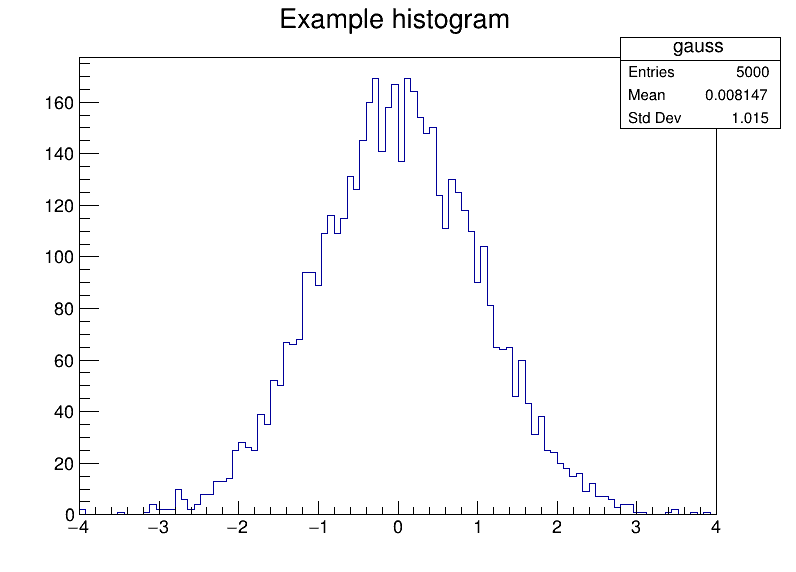

In [4]:
#Now we can check if we have everything working as we expect:
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/17323/files/3634864?module_item_id=644095

Then upload it directly. You can also run the following:

In [5]:
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

--2024-03-21 15:59:46--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666484974 (636M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetDown.root’

B2HHH_MagnetDown.ro 100%[===================>] 635.61M  19.2MB/s    in 34s     

2024-03-21 16:00:22 (18.6 MB/s) - ‘B2HHH_MagnetDown.root’ saved [666484974/666484974]



[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because H1_PZ cannot accommodate the value 51820.2
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because H1_PX cannot accommodate the value -4985.13
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #2 because H1_PZ cannot accommodate the value 90762.7
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #3 because H1_PY cannot accommodate the value 3413.79
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 4967545 out-of-range events


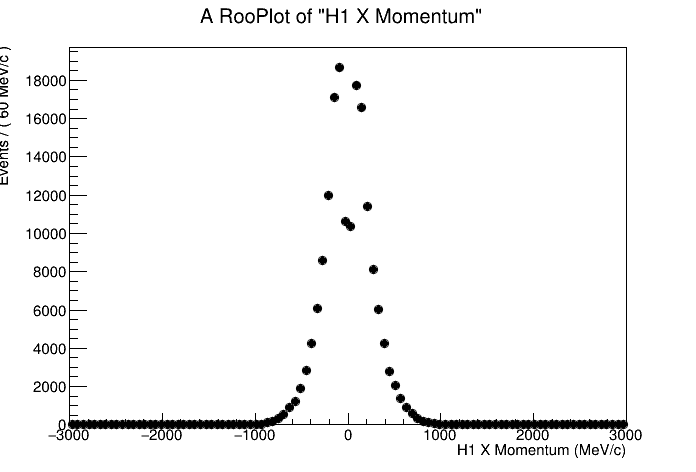

In [6]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/LHCb_Data/B2HHH_MagnetDown.root", "READONLY")
#From our file, we have to extract the DecayTree
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#Why are we here?
*just to suffer*


This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

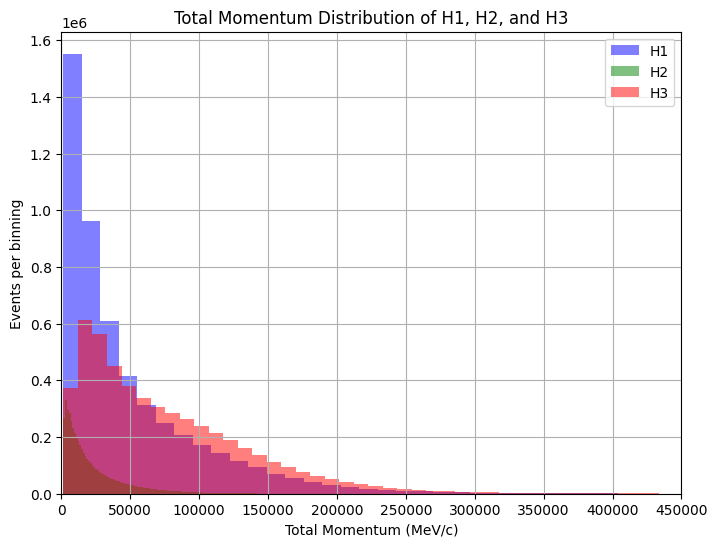

In [7]:
import uproot
import matplotlib.pyplot as plt

# Open the ROOT file using uproot
f = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")
tree = f["DecayTree"]

# Extract the total momentum of H1, H2, and H3
arrays_H1 = tree.arrays(["H1_PX", "H1_PY", "H1_PZ"])
arrays_H2 = tree.arrays(["H2_PX", "H2_PY", "H2_PZ"])
arrays_H3 = tree.arrays(["H3_PX", "H3_PY", "H3_PZ"])

# Calculate the total momentum of H1, H2, and H3
total_momentum_H1 = (arrays_H1["H1_PX"]**2 + arrays_H1["H1_PY"]**2 + arrays_H1["H1_PZ"]**2)**0.5
total_momentum_H2 = (arrays_H2["H2_PX"]**2 + arrays_H2["H2_PY"]**2 + arrays_H2["H2_PZ"]**2)**0.5
total_momentum_H3 = (arrays_H3["H3_PX"]**2 + arrays_H3["H3_PY"]**2 + arrays_H3["H3_PZ"]**2)**0.5

# Create a figure and axis object for the plot
plt.figure(figsize=(8, 6))

# Plot the total momentum distributions for H1, H2, and H3 with 50% transparency
plt.hist(total_momentum_H1, bins=1000, color='blue', alpha=0.5, label='H1')
plt.hist(total_momentum_H2, bins=1000, color='green', alpha=0.5, label='H2')
plt.hist(total_momentum_H3, bins=1000, color='red', alpha=0.5, label='H3')

# Add labels and title to the plot
plt.xlabel('Total Momentum (MeV/c)')
plt.ylabel('Events per binning')
plt.xlim(0, 4.5e5)
plt.title('Total Momentum Distribution of H1, H2, and H3')
plt.legend()
plt.grid(True)

plt.show()


Now plot the total momentum for the mother (M_Ptot)

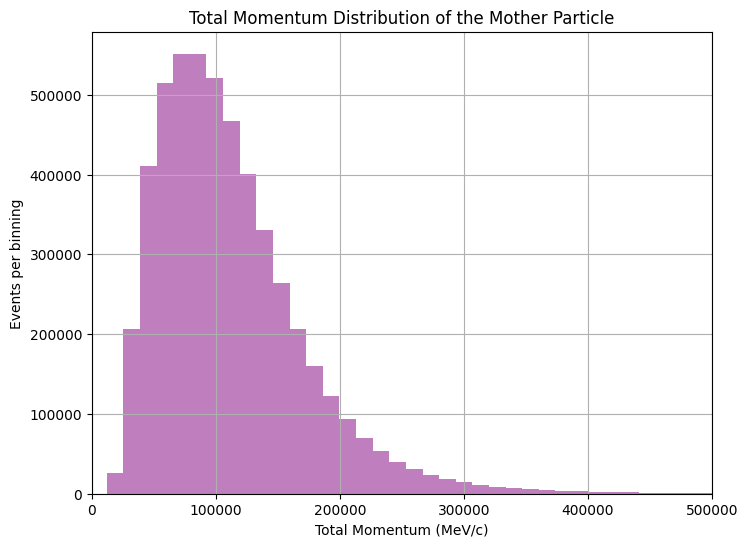

In [8]:
import uproot
import matplotlib.pyplot as plt

# Open the ROOT file using uproot
f = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")
tree = f["DecayTree"]

# Extract the total momentum of the mother particle
arrays = tree.arrays(["H1_PX", "H1_PY", "H1_PZ", "H2_PX", "H2_PY", "H2_PZ", "H3_PX", "H3_PY", "H3_PZ"])

# Calculate the total momentum of the mother particle using the provided formula
total_momentum_mother = (arrays["H1_PX"]**2 + arrays["H1_PY"]**2 + arrays["H1_PZ"]**2 +
                         arrays["H2_PX"]**2 + arrays["H2_PY"]**2 + arrays["H2_PZ"]**2 +
                         arrays["H3_PX"]**2 + arrays["H3_PY"]**2 + arrays["H3_PZ"]**2)**0.5

# Create a histogram to visualize the distribution of the total momentum of the mother particle
plt.figure(figsize=(8, 6))
plt.hist(total_momentum_mother, bins=1000, color='purple', alpha=0.5)
plt.xlabel('Total Momentum (MeV/c)')
plt.ylabel('Events per binning')
plt.xlim(0, 5e5)
plt.title('Total Momentum Distribution of the Mother Particle')
plt.grid(True)
plt.show()

We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

In [9]:
import uproot

# Open the ROOT file using uproot
f = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")

decay_tree = f["DecayTree"]

# Print the first few entries in the DecayTree
print(decay_tree.show())

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

In [10]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

# Open the ROOT file using uproot
f = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")
decay_tree = f["DecayTree"]

# Define constants
c = 299792458  # Speed of light in meters per second
m0 = 0.139570e3  # Mass of the particle in MeV/c^2 (assuming it's a pion)

# Initialize array to store invariant masses
invariant_masses = []

# Iterate over the entries in the tree and calculate the invariant mass of the B meson
for entry in decay_tree.iterate():
    # Calculate the energy of each daughter particle (H1, H2, H3) for each event
    H1_E = np.sqrt(entry["H1_PX"]**2 + entry["H1_PY"]**2 + entry["H1_PZ"]**2 + m0**2 * c**4)
    H2_E = np.sqrt(entry["H2_PX"]**2 + entry["H2_PY"]**2 + entry["H2_PZ"]**2 + m0**2 * c**4)
    H3_E = np.sqrt(entry["H3_PX"]**2 + entry["H3_PY"]**2 + entry["H3_PZ"]**2 + m0**2 * c**4)


    # Calculate the total energy of the B meson for each event
    total_energy_B = H1_E + H2_E + H3_E

    # Calculate the invariant mass of the B meson for each event
    invariant_mass_B = np.sqrt(total_energy_B**2 - total_momentum_mother**2)

    # Append the invariant mass to the array
    invariant_masses.append(invariant_mass_B)


# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(invariant_masses, bins=100, range=(4000, 7000), alpha=0.7)
plt.xlabel('Invariant Mass of B Meson (MeV/c^2)')
plt.ylabel('Events per bin')
plt.title('B Meson Mass Distribution')
plt.grid(True)
plt.show()

ValueError: cannot broadcast RegularArray of size 777390 with RegularArray of size 5135823 in subtract

This error occurred while calling

    numpy.subtract.__call__(
        <Array [1.42e+39, 1.42e+39, ..., 1.42e+39] type='777390 * float64'>
        <Array [1.42e+10, 1.14e+11, ..., 1.37e+10] type='5135823 * float64'>
    )

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

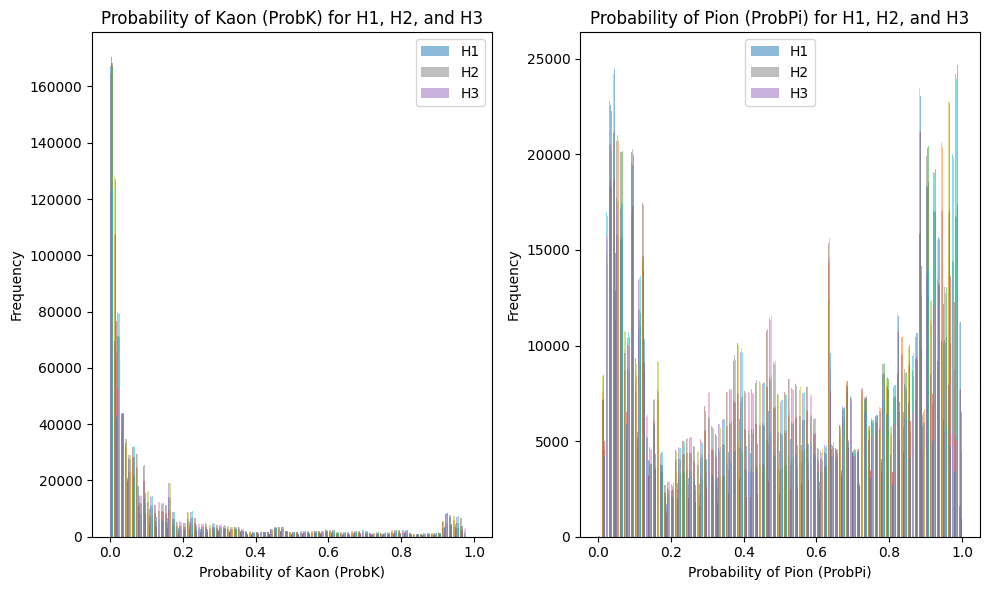

In [11]:
import uproot
import matplotlib.pyplot as plt

# Open the ROOT file using uproot
f = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")
decay_tree = f["DecayTree"]

# Define lists to store the probability values for Kaon (ProbK) and Pion (ProbPi) for H1, H2, and H3
probK_values = [[] for _ in range(3)]  # List of lists for each H particle
probPi_values = [[] for _ in range(3)]  # List of lists for each H particle

# Iterate over the entries in the tree and extract the probability values
for entry in decay_tree.iterate():
    for i in range(3):
        probK_values[i].append(entry[f'H{i+1}_ProbK'])
        probPi_values[i].append(entry[f'H{i+1}_ProbPi'])

# Plot histograms for the probability values of Kaon (ProbK) and Pion (ProbPi) for H1, H2, and H3
plt.figure(figsize=(10, 6))

# Plot Probability of Kaon (ProbK)
plt.subplot(1, 2, 1)
for i in range(3):
    plt.hist(probK_values[i], bins=100, range=(0, 1), alpha=0.5, label=f'H{i+1}')
plt.xlabel('Probability of Kaon (ProbK)')
plt.ylabel('Frequency')
plt.title('Probability of Kaon (ProbK) for H1, H2, and H3')
plt.legend()

# Plot Probability of Pion (ProbPi)
plt.subplot(1, 2, 2)
for i in range(3):
    plt.hist(probPi_values[i], bins=100, range=(0, 1), alpha=0.5, label=f'H{i+1}')

plt.xlabel('Probability of Pion (ProbPi)')
plt.ylabel('Frequency')
plt.title('Probability of Pion (ProbPi) for H1, H2, and H3')
plt.legend()

plt.tight_layout()
plt.show()

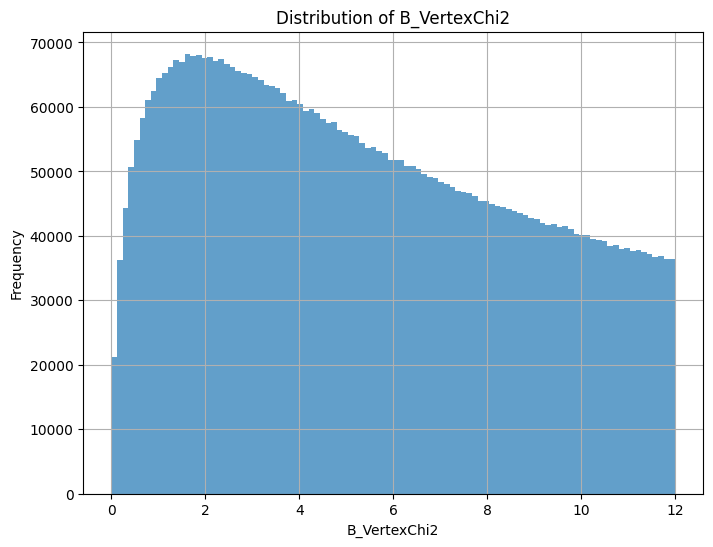

In [12]:
#For all our particles, make a plot of the B_VertexChi2
import uproot
import matplotlib.pyplot as plt

# Open the ROOT file using uproot
f = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")
decay_tree = f["DecayTree"]

# Extract the B_VertexChi2 values
b_vertex_chi2_values = decay_tree["B_VertexChi2"].array()

# Plot histogram for B_VertexChi2
plt.figure(figsize=(8, 6))
plt.hist(b_vertex_chi2_values, bins=100, range=(0, 12), alpha=0.7)
plt.xlabel('B_VertexChi2')
plt.ylabel('Frequency')
plt.title('Distribution of B_VertexChi2')
plt.grid(True)
plt.show()


Using these plots, we can now make a preselection string. This is a text string that looks like

In [ ]:
import ROOT

# Open the ROOT file and get the tree
f = ROOT.TFile.Open("/content/LHCb_Data/B2HHH_MagnetDown.root", "READ")
tree = f.Get("DecayTree")

# Define the selection criteria
selection = "H1_ProbK > 0.9"  # Example selection criteria (change as needed)

# Apply the selection to the tree and create the CutTree
CutTree = tree.CopyTree(selection)

# Create histograms for B meson mass from both the original tree and the CutTree
canvas1 = ROOT.TCanvas("canvas1", "Original Tree", 800, 600)
tree.Draw("B_Mass >> h_BMass", "", "hist")
h_BMass = ROOT.gDirectory.Get("h_BMass")
if h_BMass:
    h_BMass.SetLineColor(ROOT.kBlue)
    h_BMass.SetTitle("B Meson Mass (Original Tree)")
    h_BMass.GetXaxis().SetTitle("B Meson Mass (MeV/c^2)")
    h_BMass.GetYaxis().SetTitle("Events")
    h_BMass.Draw()
    canvas1.Update()
    canvas1.Draw()
else:
    print("Histogram h_BMass not found.")

canvas2 = ROOT.TCanvas("canvas2", "CutTree", 800, 600)
CutTree.Draw("B_Mass >> h_BMass_Cut", "", "hist")
h_BMass_Cut = ROOT.gDirectory.Get("h_BMass_Cut")
if h_BMass_Cut:
    h_BMass_Cut.SetLineColor(ROOT.kRed)
    h_BMass_Cut.SetTitle("B Meson Mass (CutTree)")
    h_BMass_Cut.GetXaxis().SetTitle("B Meson Mass (MeV/c^2)")
    h_BMass_Cut.GetYaxis().SetTitle("Events")
    h_BMass_Cut.Draw()
    canvas2.Update()
    canvas2.Draw()
else:
    print("Histogram h_BMass_Cut not found.")

# Run the event loop
ROOT.gApplication.Run()


#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

In [ ]:
#define physical measurment that we want to fit using RooRealVar
# var = ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass = ROOT.RooRealVar("M_m0","Mass",4700,5900,"MeV/C^{2}")

#passing the rest of the variables into the model
#For the RooRealVar the last three parameters are given, "starting value" and min/max values
gaussMean = ROOT.RooRealVar("Mean","Mean",4800,4900,5900)
gaussWidth = ROOT.RooRealVar("Width","Width",40,0,7000)

#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)
#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add the normalisation factors at the end as scaling factors

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )

In [ ]:
#Put our data set into a RooDataSet structure

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", CutTree, ROOT.RooArgSet(mass))

#Then we can do the fitting:

model.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below

In [ ]:
#Now to plot it all
c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [ ]:
#Here do your calculation of the final result
import ROOT

# Open the ROOT file and get the tree
f = ROOT.TFile.Open("/content/LHCb_Data/B2HHH_MagnetDown.root", "READ")
tree = f.Get("DecayTree")

# Define the selection criteria for pre-selection
pre_selection = "H1_ProbK > 0.9"  # Example pre-selection criteria (change as needed)

# Create two histograms for B meson mass for B+ and B- events
canvas = ROOT.TCanvas("canvas", "B Meson Mass", 800, 600)
hist_BMass_Bplus = ROOT.TH1F("hist_BMass_Bplus", "B Meson Mass (B+)", 100, 5000, 6000)
hist_BMass_Bminus = ROOT.TH1F("hist_BMass_Bminus", "B Meson Mass (B-)", 100, 5000, 6000)

# Loop over each event in the dataset
for event in tree:
    # Check charges of daughters to determine if the event is B+ or B-
    total_charge = event.H1_Charge + event.H2_Charge + event.H3_Charge
    if total_charge == 1:
        event_type = "B-"  # B- decay
    elif total_charge == -1:
        event_type = "B+"  # B+ decay
    else:
        continue  # Skip events with 0 or 3 charges

    # Apply pre-selection criteria
    if not eval(pre_selection):
        continue  # Skip events that do not pass pre-selection

    # Plot B meson mass for B+ and B- events separately
    if event_type == "B-":
        hist_BMass_Bminus.Fill(event.B_Mass)
    elif event_type == "B+":
        hist_BMass_Bplus.Fill(event.B_Mass)

# Fit the histograms to find the yields (NB+ and NB-)
fit_Bplus = hist_BMass_Bplus.Fit("gaus", "S")
fit_Bminus = hist_BMass_Bminus.Fit("gaus", "S")

# Calculate the asymmetry
NBplus = fit_Bplus.Parameter(0)
NBminus = fit_Bminus.Parameter(0)
A = (NBminus - NBplus) / (NBminus + NBplus)

# Calculate the uncertainty on the asymmetry
sigma_A = (1 - A**2) / (NBminus + NBplus)**0.5

# Print the results
print("Asymmetry (A):", A)
print("Uncertainty (σA):", sigma_A)

# Draw the histograms
hist_BMass_Bplus.Draw()
hist_BMass_Bminus.Draw("same")
canvas.Update()
canvas.Draw()

# Run the event loop
ROOT.gApplication.Run()


#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons
import numpy as np

def invariant_mass(K1_px, K1_py, K1_pz, K1_E, K2_px, K2_py, K2_pz, K2_E):
    """
    Calculate the invariant mass of two given kaons.

    Arguments:
    K1_px, K1_py, K1_pz: Momentum components of the first kaon.
    K1_E: Energy of the first kaon.
    K2_px, K2_py, K2_pz: Momentum components of the second kaon.
    K2_E: Energy of the second kaon.

    Returns:
    The invariant mass of the two kaons.
    """
    # Calculate the energy and momentum components sum
    total_energy = K1_E + K2_E
    total_px = K1_px + K2_px
    total_py = K1_py + K2_py
    total_pz = K1_pz + K2_pz

    # Calculate the invariant mass
    invariant_mass_sq = total_energy**2 - total_px**2 - total_py**2 - total_pz**2
    if invariant_mass_sq >= 0:
        return np.sqrt(invariant_mass_sq)
    else:
        return np.nan  # Return NaN if the invariant mass is imaginary or negative


In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter
import ROOT

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Dalitz Plot", 800, 600)

# Create a 2D histogram for the Dalitz plot
hist_dalitz = ROOT.TH2F("dalitz_plot", "Dalitz Plot", 100, 0, 5000, 100, 0, 5000)

# Fill the histogram with the invariant masses of the intermediate states
for entry in CutTree:
    # Calculate the invariant mass of the intermediate states
    inv_mass_R0 = invariant_mass(entry["K1_PX"], entry["K1_PY"], entry["K1_PZ"], entry["K1_P"],
                                  entry["K2_PX"], entry["K2_PY"], entry["K2_PZ"], entry["K2_P"])
    inv_mass_Rplus = invariant_mass(entry["K1_PX"], entry["K1_PY"], entry["K1_PZ"], entry["K1_P"],
                                     entry["K3_PX"], entry["K3_PY"], entry["K3_PZ"], entry["K3_P"])

    # Fill the histogram
    hist_dalitz.Fill(inv_mass_R0, inv_mass_Rplus)

# Set histogram options
hist_dalitz.SetXTitle("Invariant Mass of R0 (MeV/c^2)")
hist_dalitz.SetYTitle("Invariant Mass of R+ (MeV/c^2)")

# Draw the Dalitz plot
hist_dalitz.Draw("colz")

# Update the canvas
canvas.Update()
canvas.Draw()


We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [ ]:
#Make the revised Dalitz plot here for B+ mesons

In [ ]:
#Make the revised Dalitz plot here for B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)